# 특성 공학과 규제

## 다중회귀
2절에서는 1개의 특성을 사용 - 직선 학습 </br>
2개의 특성을 사용 - 평면 학습 </br>
이를 바탕으로 예제: 농어의 길이 $\times$ 농어의 높이 </br>
각 특성을 곱해서 새로운 특성을 만드는 작업 = 특성 공학 (feature engineering)

## 데이터 준비

In [1]:
import pandas as pd

In [ ]:
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()                            # 넘파이 형태로 쉽게 변환
print(perch_full)

In [3]:
import numpy as np                                    # 정답 데이터 입력

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [5]:
from sklearn.model_selection import train_test_split          # 훈련 세트와 테스트 세트로 구분

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

## 사이킷런의 변환기

변환기(transformer) : 특성을 만들거나 전처리하기 위한 다양한 클래스 </br>
사이킷 런 모델 크래스에 일관적으로 fit(), score(), predict() 메서드가 있는 것처럼 </br>
fit(), transform() 메서드 제공 </br>
fit()과 transform()을 통해 특성 변환: </br>
 예를 들면, 특성이 3개라면 9개의 변환 특성이 나온다. </br> 
각 특성(3개), 각 특성의 제곱값(3개), 각 특성끼리의 곱(3개 = $_3C_2$)

In [4]:
# 변환기 - preprocessing 패키지에 포함
from sklearn.preprocessing import PolynomialFeatures
# fit() 메서드는 새롭게 만들 _특성 조합을 찾음_: 변환하는 데 타깃 데이터가 필요하지 않으므로, 입력 데이터만 전달
# transform() 메서드는 fit 결과에 따라 _실제로 데이터를 변환_

In [11]:
poly = PolynomialFeatures()
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))
# 기능에서 자동으로 절편값 1을 추가함

[[1. 2. 3. 4. 6. 9.]]


In [ ]:
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))
# 절편값 1을 추가하지 않고 특성 변환

[[2. 3. 4. 6. 9.]]


#### 실제 train 데이터에 적용

In [12]:
poly = PolynomialFeatures(include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)                         # 변환한 데이터의 크기 확인

(42, 9)


In [13]:
# 변환한 데이터가 어떻게 계산되었는지 확인 (각 특성(3개), 각 특성의 제곱값(3개), 각 특성끼리의 곱(3개 = 3C2) )
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [14]:
test_poly = poly.transform(test_input)
# 테스트 세트도 변환              

## 다중 회귀 모델 훈련하기

In [15]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9903183436982125


In [16]:
# 테스트 세트에 대한 점수도 확인: 과소적합 문제는 나타나지 않음
print(lr.score(test_poly, test_target))

0.9714559911594111


In [17]:
# 특성을 더 많이 추가한다면? degree = 5

poly = PolynomialFeatures(degree=5, include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

In [19]:
print(train_poly.shape) # 특성의 개수가 55개나 만들어짐

(42, 55)


In [20]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
# 특성의 개수를 늘리면 선형 모델이 매우 강력해짐 = 훈련 세트에 대해서 거의 완벽하게 학습
# 하지만 훈련 세트에 대해 너무 과대적합되는 문제 = 테스트 세트에서는 형편없는 점수가 나온다

0.9999999999996433


In [21]:
print(lr.score(test_poly, test_target))

-144.40579436844948


## 규제

선형 회귀모델의 과대 적합을 막아주는 방법: </br>
특성에 곱해지는 계수(또는 기울기)의 크기를 작게 만든다. </br>
릿지와 라쏘: 선형 회귀 모델에 규제를 추가한 모델   
릿지: 계수를 곱한 값을 기준으로 규제를 적용  
라쏘: 계수의 절댓값을 기준으로 규제를 적용   
일반적으로 릿지를 조금 더 선호   

In [22]:
# 변환기를 사용
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)
# 표준점수로 변환한 train_scaled와 text_scaled가 준비됨
# 훈련 세트에서 학습한 평균과 표준편차는 StandardScaler 클래스 객체의 mean_, scale_ 속성에 저장됨

## 릿지

In [23]:
# linear_model 패키지 안에 Ridge와 Lasso 포함
# 모델 객체를 만들고, fit() 메서드에서 훈련한 다음, score() 메서드로 평가
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target)           # 변환한 train_scaled 데이터로 릿지모델 훈련
print(ridge.score(train_scaled, train_target))

0.9896101671037343


In [ ]:
print(ridge.score(test_scaled, test_target))  # 테스트 세트 점수 확인 - 과소적합 없음

0.9790693977615379


릿지와 라쏘 모델 사용 시, 규제의 양을 임의로 조정할 수 있음   
모델 객체를 만들 때 alpha 매개변수로 규제의 강도를 조절   
alpha 값이 크면 규제 강도가 세지고, 계수 값을 더 줄이고 더 과소적합되도록 유도됨   
alpha 값이 작으면 계수를 줄이는 역할이 줄어들고, 선형 회귀모델과 유사해지므로 과대적합 가능성이 높아짐   
* 참고: alpha 값은 사전에 직접 지정해야 하는 값.
* 이렇게 학습 시 사람이 알려줘야 하는 파라미터를 하이퍼파라미터(hyperparameter)라고 부름

In [24]:
# 시각화 준비

import matplotlib.pyplot as plt

train_score = []
test_score = []

In [25]:
########## 알파값에 따라 회귀 결과 점수(=score)가 어떻게 바뀌는지 확인해보자!!!

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100] 
for alpha in alpha_list:
    # 릿지 모델을 만듭니다
    ridge = Ridge(alpha=alpha)
    # 릿지 모델을 훈련합니다
    ridge.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

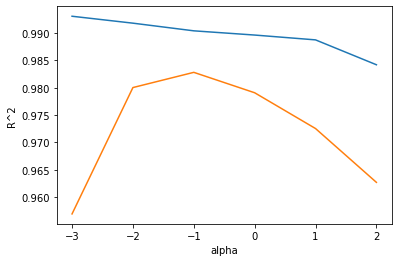

In [26]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

alpha 값이 작을수록 과대적합(훈련 score와 테스트 score 간 차이가 크다)   
무조건 alpha 값이 크다고해서 좋은 것도 아님 = 과소적합 가능성   
즉, 둘 간의 차이가 가장 작을 때 모델이 가장 적합하다고 할 수 있다.   
해당 모델에서 최적의 alpha 값은 -1, 즉 1/10

In [27]:
# 가장 차이가 작은 alpha 값 적용
ridge = Ridge(alpha=0.1)
# 후 재 학습
ridge.fit(train_scaled, train_target)

# 결과: 회귀 계수가 더 높아진 것을 확인함
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570367
0.9827976465386928


## 라쏘

결과값만 보면, 규제를 적용시키지 않은 경우 릿지보다 라쏘가 더 score가 높게 나온다

In [29]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.989789897208096
0.9800593698421883


In [30]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 라쏘 모델을 만듭니다
    lasso = Lasso(alpha=alpha, max_iter=10000)
    # 라쏘 모델은 최적의 계수를 찾기 위해 반복적인 계산을 수행, 반복횟수를 충분히 늘리기 위해 max_iter 값을 10000으로 지정
    # 라쏘 모델을 훈련합니다
    lasso.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


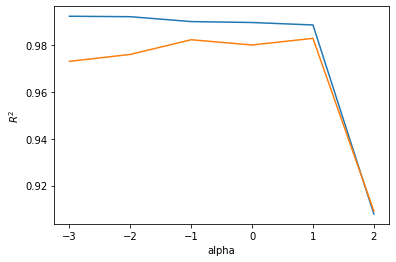

In [35]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('$R^2$')
plt.show()

좌측은 과대적합, 우측으로 갈수록 과소적합.   
해당 모델에서는 최적의 alpha 값은 1

In [36]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [37]:
# 라쏘 모델은 계수 값을 아예 0으로 만들 수 있는데,
# 라쏘 모델의 계수는 coef_ 속성에 저장되어 있으므로 이를 호출하여 사용할 수 있다.
# 계수가 0인 것의 갯수를 세어보면 40개가 있다. 
print(np.sum(lasso.coef_ == 0))

40
